### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
uploaded = files.upload()
dataset_train= pd.read_csv(io.BytesIO(uploaded['AZN.csv']))

In [3]:
dataset_train.shape

(1259, 7)

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-27,34.160000,34.240002,34.029999,34.049999,28.057058,1252400
1,2015-11-30,34.189999,34.240002,34.000000,34.049999,28.057058,3776000
2,2015-12-01,34.330002,34.880001,34.169998,34.770000,28.650333,4550400
3,2015-12-02,34.740002,34.830002,34.240002,34.320000,28.279539,4100800
4,2015-12-03,34.360001,34.369999,33.480000,33.570000,27.661539,5124000
...,...,...,...,...,...,...,...
1254,2020-11-19,54.250000,54.250000,53.669998,54.029999,54.029999,6768200
1255,2020-11-20,54.880001,55.419998,54.680000,55.299999,55.299999,4306000
1256,2020-11-23,54.520000,54.709999,53.330002,54.700001,54.700001,13670600
1257,2020-11-24,54.000000,54.299999,53.520000,53.570000,53.570000,8341400


### Visualization

In [5]:
df_viz=dataset_train.copy()

In [6]:
df_viz['Date'] = pd.to_datetime(df_viz['Date'])


In [7]:
df_viz.index = df_viz["Date"]


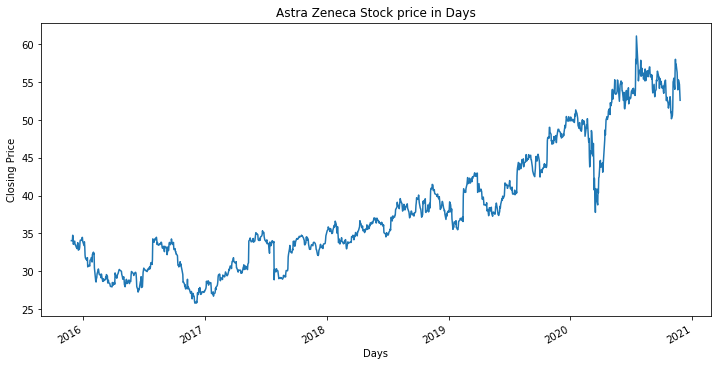

In [8]:
df_viz["Close"].plot(figsize = (12,6))
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title("Astra Zeneca Stock price in Days")
plt.show()

### Train data

In [ ]:
training_set = dataset_train.iloc[:, 4:5].values

In [ ]:
training_set

array([[43.57    ],
       [42.849998],
       [42.98    ],
       ...,
       [58.25    ],
       [58.110001],
       [61.279999]])

### Normalizing the data

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Setting 60 time step as features and 1 as output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
y_train

array([0.10852933, 0.1008785 , 0.08104282, ..., 0.81864559, 0.78662516,
       0.75913856])

### Reshaping the features

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Importing deep learning model

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Defining the model

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Running the model

In [ ]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 6s 152ms/step - loss: 0.0189
Epoch 2/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0052
Epoch 3/200
38/38 [==============================] - 8s 199ms/step - loss: 0.0039
Epoch 4/200
38/38 [==============================] - 9s 243ms/step - loss: 0.0039
Epoch 5/200
38/38 [==============================] - 6s 154ms/step - loss: 0.0040
Epoch 6/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0054
Epoch 7/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0034
Epoch 8/200
38/38 [==============================] - 6s 153ms/step - loss: 0.0030
Epoch 9/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0032
Epoch 10/200
38/38 [==============================] - 6s 156ms/step - loss: 0.0032
Epoch 11/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0029
Epoch 12/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0033
Epoch 13/200


### Test data

In [ ]:
dataset_test=dataset_train.tail(180)

In [ ]:
dataset_test.shape

(180, 7)

In [ ]:
real_stock_price = dataset_test.iloc[:, 4:5].values

In [ ]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs.shape

(240, 1)

### Predicting test data

In [ ]:
X_test = []
for i in range(60, 240):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting predicted and actual test data

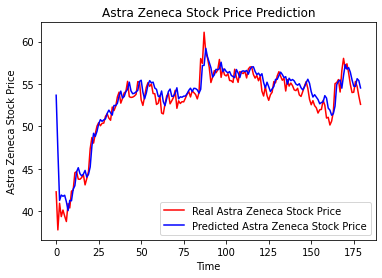

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Astra Zeneca Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Astra Zeneca Stock Price')
plt.title('Astra Zeneca Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Astra Zeneca Stock Price')
plt.legend()
plt.show()

## Plotting train, test and predictions

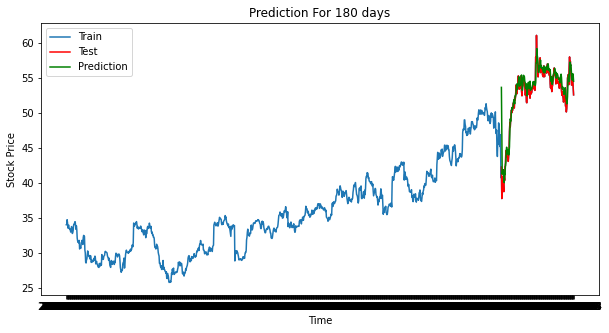

In [ ]:
pred=pd.DataFrame(predicted_stock_price)
plt.figure(figsize=(10, 5))
plt.plot(dataset_train['Date'], dataset_train['Close'],label='Train')
plt.plot(dataset_test['Date'], dataset_test['Close'], label='Test',color='r')
plt.plot(dataset_test['Date'], predicted_stock_price, label='Prediction',color='g')
plt.title("Prediction For 180 days")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc='best')
plt.show()

In [ ]:
pred

,0
0,61.290829
1,52.728172
2,46.482918
3,48.409103
4,49.906296
...,...
175,60.045288
176,59.721893
177,59.762909
178,58.918377


### Evaluating the model

In [ ]:
from sklearn import metrics

In [ ]:
R_Score =metrics.r2_score(dataset_test['Close'],predicted_stock_price)

In [ ]:
#R_Score = metrics.mean_squared_error(testY[0], testPredict[:,0]) ** .5
print('Test Score: %.2f Accuracy' % (R_Score))


Test Score: 0.87 Accuracy
